# **Predict Customer Clicked Ads Classification by Using Machine Learning**

## **Load Dataset**
---

In [3]:
# import library
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
# read dataset
read = pd.read_csv('Clicked Ads Dataset.csv')

## **EDA**
---

In [3]:
# backup
df = read.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


### **Overview**

In [5]:
df.sample(3)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
929,929,82.49,45,270517800.0,130.84,Perempuan,5/31/2016 0:58,Yes,Jakarta Barat,Daerah Khusus Ibukota Jakarta,House
575,575,48.86,54,372320830.0,134.46,Perempuan,1/9/2016 17:33,Yes,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Furniture
557,557,79.67,28,410032840.0,226.79,Perempuan,7/20/2016 1:56,No,Pontianak,Kalimantan Barat,House


In [9]:
# overview
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df[col].nunique(), df[col].unique()[:10]])
desc_df = pd.DataFrame(data=list_item, columns='feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(","))
desc_df

,feature,data_type,null_values,null_percentage,unique_values,unique_sample
0,Unnamed: 0,int64,0,0.0,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"
1,Daily Time Spent on Site,float64,13,1.3,890,"[68.95, 80.23, 69.47, 74.15, 68.37, 59.99, 88...."
2,Age,int64,0,0.0,43,"[35, 31, 26, 29, 23, 33, 48, 30, 20, 49]"
3,Area Income,float64,13,1.3,987,"[432837300.0, 479092950.00000006, 418501580.0,..."
4,Daily Internet Usage,float64,11,1.1,955,"[256.09, 193.77, 236.5, 245.89, 225.58, 226.74..."
5,Male,object,3,0.3,2,"[Perempuan, Laki-Laki, nan]"
6,Timestamp,object,0,0.0,997,"[3/27/2016 0:53, 4/4/2016 1:39, 3/13/2016 20:3..."
7,Clicked on Ad,object,0,0.0,2,"[No, Yes]"
8,city,object,0,0.0,30,"[Jakarta Timur, Denpasar, Surabaya, Batam, Med..."
9,province,object,0,0.0,16,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Tim..."


In [10]:
# numerikal fitur
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()
nums

['Unnamed: 0',
 'Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage']

In [11]:
# kategorikal fitur
cats = df.loc[:, (df.dtypes == 'object')].columns.tolist()
cats

['Male', 'Timestamp', 'Clicked on Ad', 'city', 'province', 'category']

### **Univariate Analysis**

#### **Numerical Feature**

In [12]:
df[nums].describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,500.0,289.0,0.0,250.0,500.0,749.0,999.0
Daily Time Spent on Site,987.0,65.0,16.0,33.0,51.0,68.0,78.0,91.0
Age,1000.0,36.0,9.0,19.0,29.0,35.0,42.0,61.0
Area Income,987.0,384864671.0,94079990.0,97975500.0,328632990.0,399068320.0,458355450.0,556393600.0
Daily Internet Usage,989.0,180.0,44.0,105.0,139.0,183.0,219.0,267.0


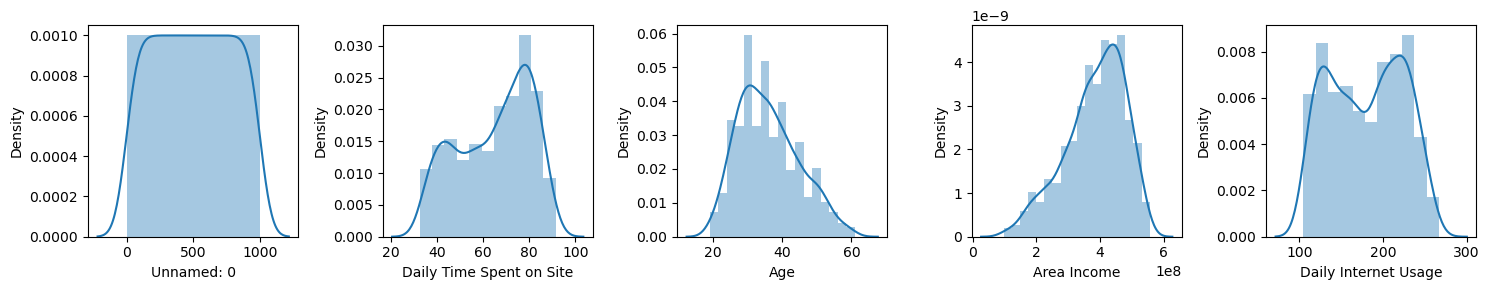

In [13]:
# distribusi menggunakan displot
plt.figure(figsize=(15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, 5, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

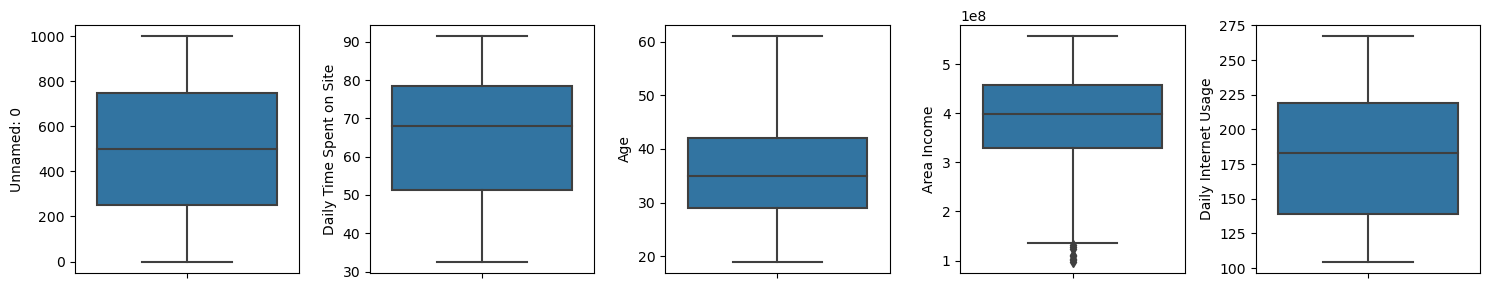

In [14]:
# distribusi menggunakan boxplot
plt.figure(figsize=(15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(df, y=df[nums[i]], orient='v')
    plt.tight_layout()

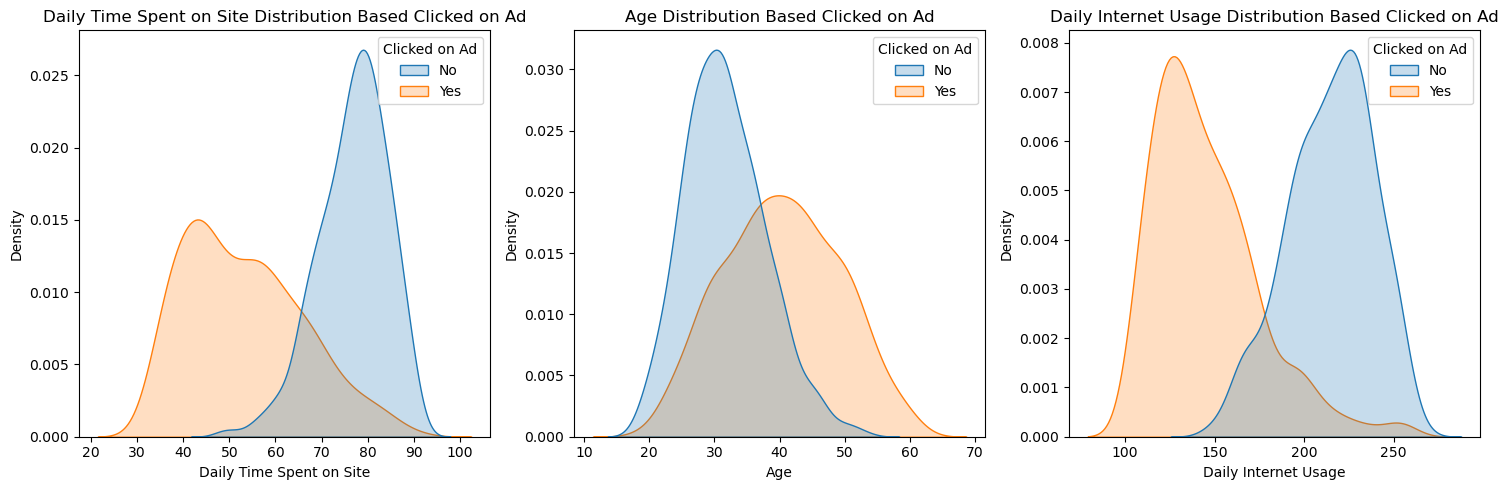

In [15]:
feats = ['Daily Time Spent on Site', 'Age', 'Daily Internet Usage']

# distribusi menggunakan displot
plt.figure(figsize=(15, 5))
for i in range(0, len(feats)):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(df, x=df[feats[i]], hue=df['Clicked on Ad'], fill=True).set(title=f'{feats[i]} Distribution Based Clicked on Ad')
    plt.tight_layout()

#### **Categorical Feature**

In [16]:
df[cats].describe().T

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


In [17]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Value count kolom Male:
--------------------------------------------------
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64

Value count kolom Timestamp:
--------------------------------------------------
5/26/2016 15:40    2
5/30/2016 8:02     2
5/20/2016 12:17    2
5/15/2016 3:10     1
4/5/2016 8:18      1
                  ..
5/12/2016 4:35     1
1/1/2016 21:58     1
3/13/2016 13:50    1
7/16/2016 14:13    1
6/3/2016 21:43     1
Name: Timestamp, Length: 997, dtype: int64

Value count kolom Clicked on Ad:
--------------------------------------------------
No     500
Yes    500
Name: Clicked on Ad, dtype: int64

Value count kolom city:
--------------------------------------------------
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tanger

### **Bivariate Analysis**

#### **Numerical Feature and Click on Ad**

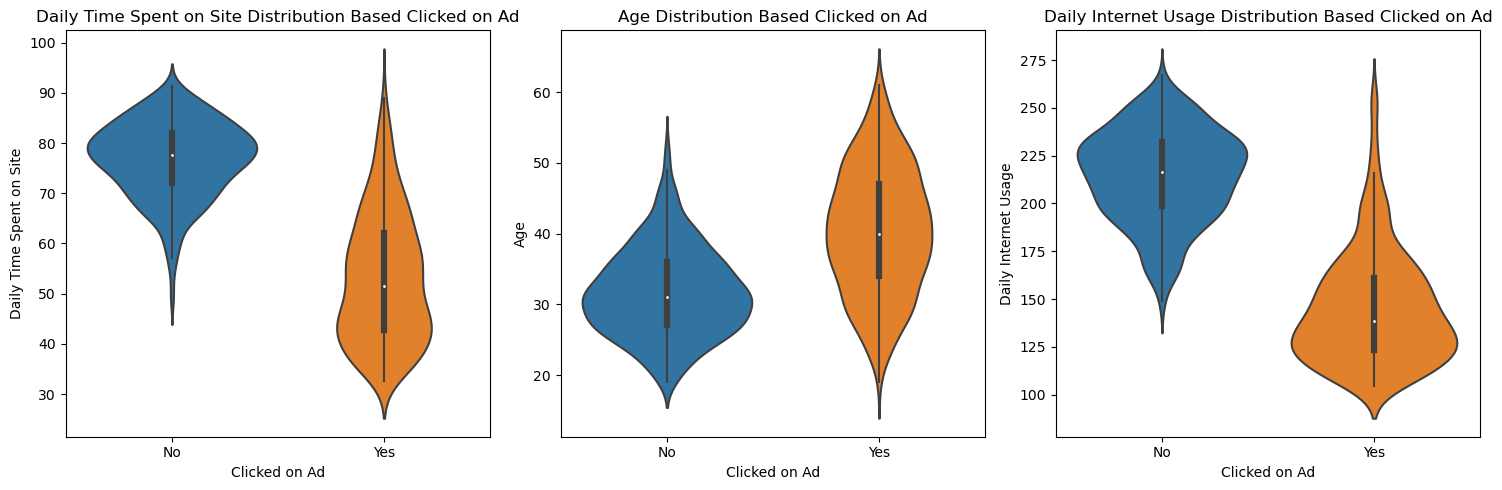

In [18]:
# distribusi menggunakan violinplot
plt.figure(figsize=(15, 5))
for i in range(0, len(feats)):
    plt.subplot(1, 3, i+1)
    sns.violinplot(df, y=df[feats[i]], x=df['Clicked on Ad']).set(title=f'{feats[i]} Distribution Based Clicked on Ad')
    plt.tight_layout()

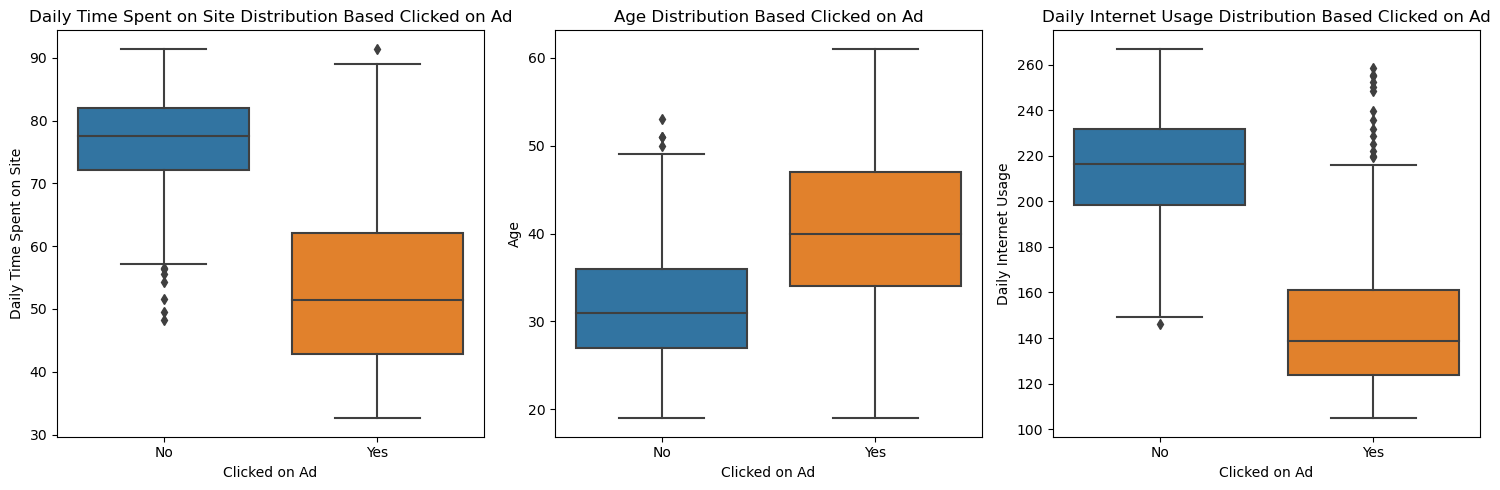

In [19]:
# distribusi menggunakan boxplot
plt.figure(figsize=(15, 5))
for i in range(0, len(feats)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(df, y=df[feats[i]], x=df['Clicked on Ad'], orient='v').set(title=f'{feats[i]} Distribution Based Clicked on Ad')
    plt.tight_layout()

In [20]:
feats = ['Daily Time Spent on Site', 'Age', 'Daily Internet Usage']

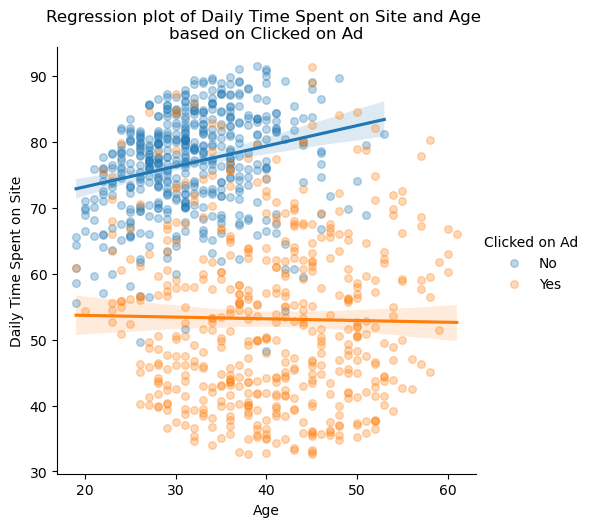

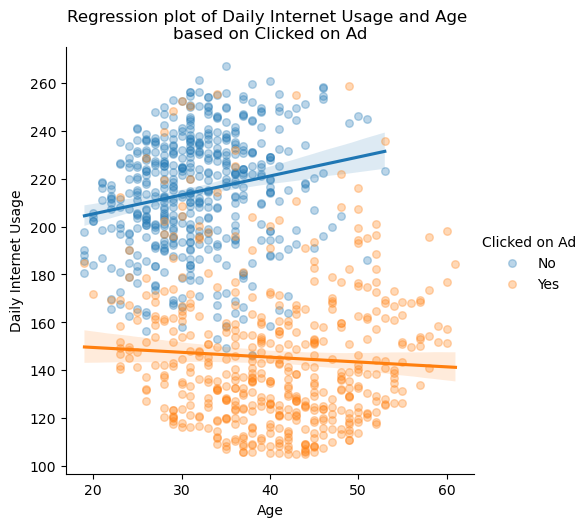

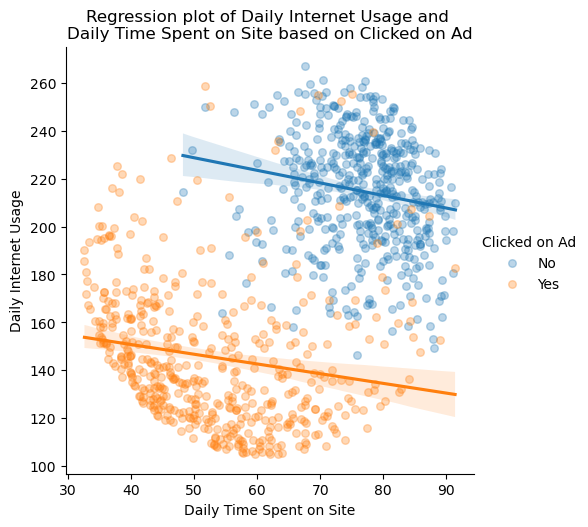

In [21]:
sns.lmplot(y='Daily Time Spent on Site', x='Age', data=df, hue='Clicked on Ad', 
           scatter_kws={'s':30, 'alpha':0.3}).set(title=f'Regression plot of Daily Time Spent on Site and Age \nbased on Clicked on Ad')
sns.lmplot(y='Daily Internet Usage', x='Age', data=df, hue='Clicked on Ad', 
           scatter_kws={'s':30, 'alpha':0.3}).set(title=f'Regression plot of Daily Internet Usage and Age \nbased on Clicked on Ad')
sns.lmplot(y='Daily Internet Usage', x='Daily Time Spent on Site', data=df, hue='Clicked on Ad', 
           scatter_kws={'s':30, 'alpha':0.3}).set(title=f'Regression plot of Daily Internet Usage and \nDaily Time Spent on Site based on Clicked on Ad')

#### **Categorical Feature and Click on Ad**

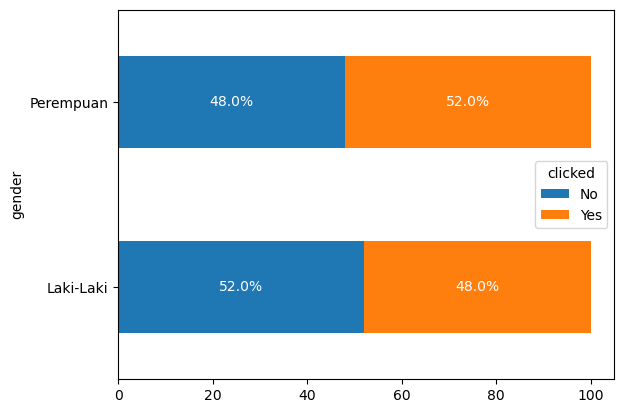

In [22]:
gender_click = df.groupby(['Male','Clicked on Ad']).agg({'Unnamed: 0' : 'count'}).reset_index()
gender_click.columns = ['gender','clicked','total']
gender_click['%'] = gender_click.groupby('gender').apply(lambda x: round(x.total/x.total.sum() *100, 0)).values
pvt = gender_click.pivot_table(index='gender', columns='clicked', values='%')

# creating visualization
ax = pvt.plot(kind='barh', stacked=True)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center', color='white')

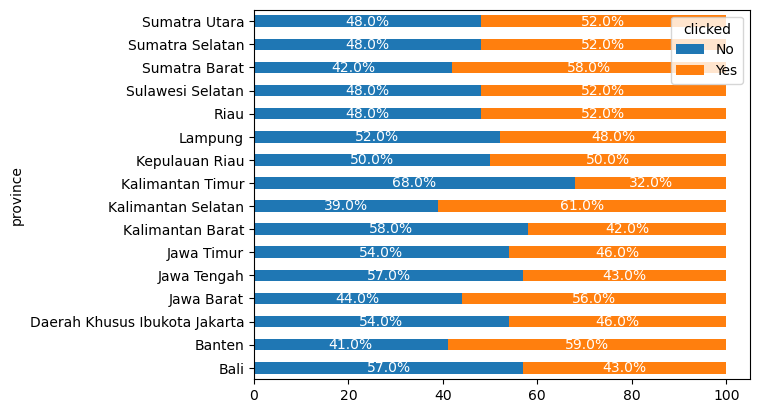

In [23]:
df_group = df.groupby(['province','Clicked on Ad']).agg({'Unnamed: 0' : 'count'}).reset_index()
df_group.columns = ['province','clicked','total']
df_group['%'] = df_group.groupby('province').apply(lambda x: round(x.total/x.total.sum() *100, 0)).values
pvt = df_group.pivot_table(index='province', columns='clicked', values='%')

# creating visualization
ax = pvt.plot(kind='barh', stacked=True)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center', color='white')

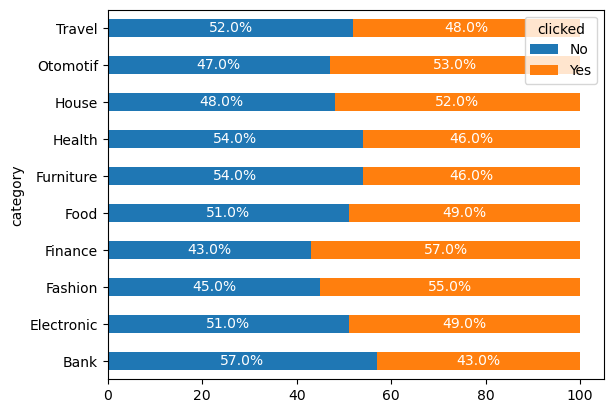

In [24]:
df_group = df.groupby(['category','Clicked on Ad']).agg({'Unnamed: 0' : 'count'}).reset_index()
df_group.columns = ['category','clicked','total']
df_group['%'] = df_group.groupby('category').apply(lambda x: round(x.total/x.total.sum() *100, 0)).values
pvt = df_group.pivot_table(index='category', columns='clicked', values='%')

# creating visualization
ax = pvt.plot(kind='barh', stacked=True)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center', color='white')

#### **Sessions and Click on Ad**

In [25]:
df1 = df.copy()

In [26]:
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

df1['Month'] = df1['Timestamp'].dt.month
df1['Week_day'] = df1['Timestamp'].dt.dayofweek
df1['Hour'] = df1['Timestamp'].dt.hour
df1 = df1.drop(['Timestamp'], axis=1)

<AxesSubplot: xlabel='Month', ylabel='count'>

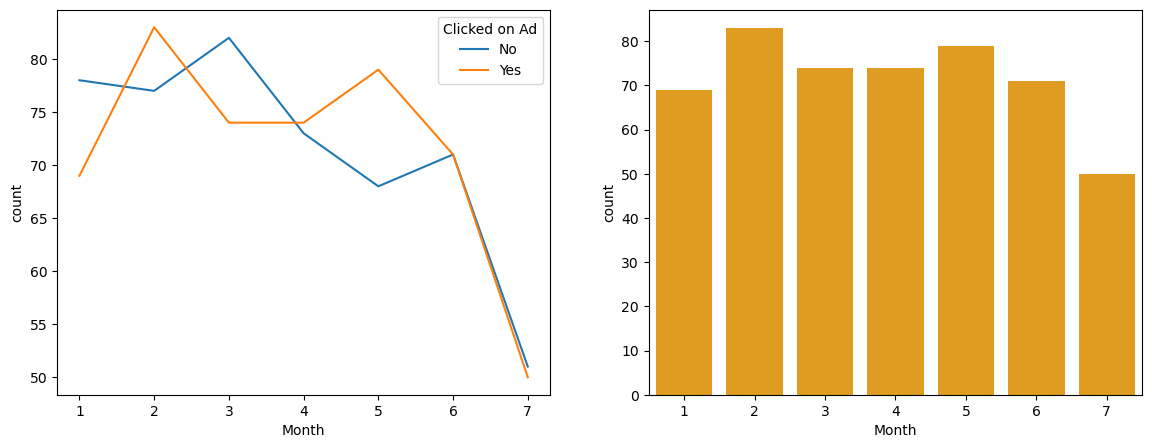

In [27]:
clicked_per_month = df1.groupby(['Month', 'Clicked on Ad'])[['Unnamed: 0']].count()
clicked_per_month.rename(columns={'Unnamed: 0': 'count'}, inplace=True)
clicked_per_month.reset_index()

f,ax=plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x='Month', y='count', hue='Clicked on Ad', data=clicked_per_month, ax = ax[0])
sns.countplot(data=df1[df1['Clicked on Ad'] == 'Yes'], x='Month', color='orange', ax = ax[1])

<AxesSubplot: xlabel='Week_day', ylabel='count'>

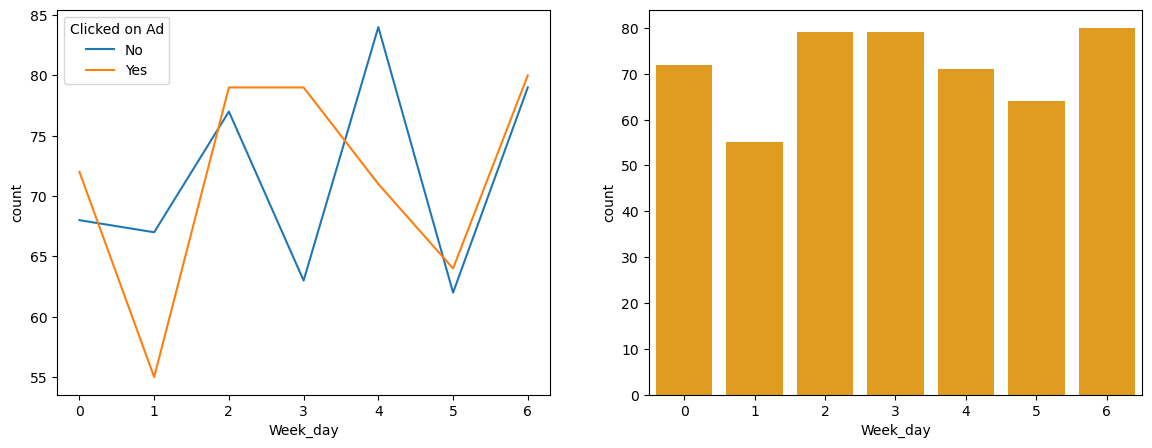

In [28]:
clicked_per_wkday = df1.groupby(['Week_day', 'Clicked on Ad'])[['Unnamed: 0']].count()
clicked_per_wkday.rename(columns={'Unnamed: 0': 'count'}, inplace=True)
clicked_per_wkday.reset_index()

f,ax=plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x='Week_day', y='count', hue='Clicked on Ad', data=clicked_per_wkday, ax = ax[0])
sns.countplot(data=df1[df1['Clicked on Ad'] == 'Yes'], x='Week_day', color='orange', ax = ax[1])

<AxesSubplot: xlabel='Hour', ylabel='count'>

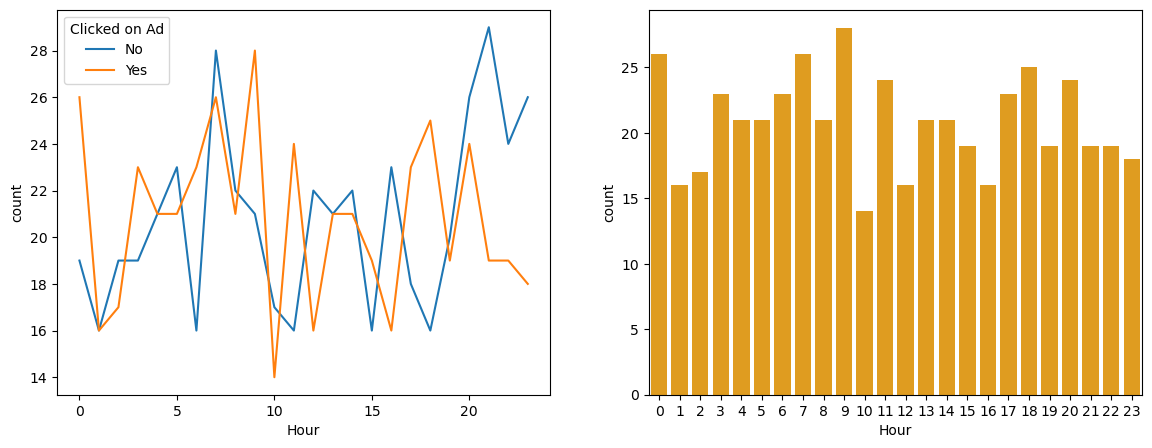

In [29]:
clicked_per_hr = df1.groupby(['Hour', 'Clicked on Ad'])[['Unnamed: 0']].count()
clicked_per_hr.rename(columns={'Unnamed: 0': 'count'}, inplace=True)
clicked_per_hr.reset_index()

f,ax=plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x='Hour', y='count', hue='Clicked on Ad', data=clicked_per_hr, ax = ax[0])
sns.countplot(data=df1[df1['Clicked on Ad'] == 'Yes'], x='Hour', color='orange', ax = ax[1])

### **Multivariate Analysis**

In [30]:
df1['Clicked[Y/N]'] = df1['Clicked on Ad'].map({'Yes':1, 'No':0})

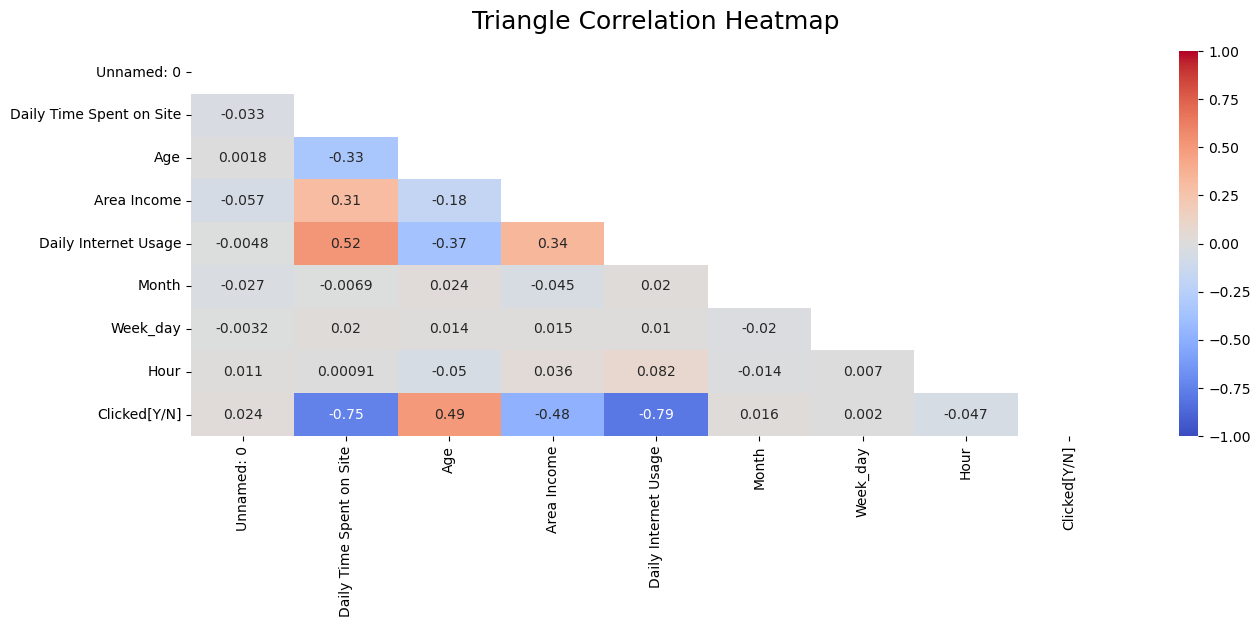

In [31]:
plt.figure(figsize=(15, 5))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df1.corr(), dtype=np.bool))
heatmap = sns.heatmap(df1.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [32]:
df1.corr()['Clicked[Y/N]'].sort_values(ascending=False)

Clicked[Y/N]                1.000000
Age                         0.492531
Unnamed: 0                  0.024117
Month                       0.016095
Week_day                    0.002003
Hour                       -0.047431
Area Income                -0.477576
Daily Time Spent on Site   -0.746514
Daily Internet Usage       -0.789693
Name: Clicked[Y/N], dtype: float64

## **Data Cleaning**
---

In [33]:
df_cleaned = df1

In [34]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
 10  Month                     1000 non-null   int64  
 11  Week_day                  1000 non-null   int64  
 12  Hour                      1000 non-null   int64  
 13  Clicked[Y/N]              1000 non-null   int64  
dtypes: float6

In [35]:
# df_cleaned.drop(columns = ['Unnamed: 0', 'city', 'province', 'Clicked on Ad'], inplace=True)

In [36]:
df_cleaned.isna().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Clicked on Ad                0
city                         0
province                     0
category                     0
Month                        0
Week_day                     0
Hour                         0
Clicked[Y/N]                 0
dtype: int64

In [37]:
df_cleaned.fillna(df_cleaned.median(), inplace=True)

In [38]:
df_cleaned['Male'].fillna('Perempuan', inplace = True)

In [39]:
df_cleaned.isna().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Clicked on Ad               0
city                        0
province                    0
category                    0
Month                       0
Week_day                    0
Hour                        0
Clicked[Y/N]                0
dtype: int64

In [40]:
df_cleaned.sample(5).T

,935,471,556,579,221
Unnamed: 0,935,471,556,579,221
Daily Time Spent on Site,83.98,67.69,56.2,68.11,75.83
Age,36,37,49,38,27
Area Income,478141370.0,534857330.0,374849580.0,517191360.0,472612490.0
Daily Internet Usage,194.62,216.57,114.85,231.21,200.59
Male,Perempuan,Perempuan,Laki-Laki,Perempuan,Perempuan
Clicked on Ad,No,No,Yes,No,No
city,Malang,Jakarta Timur,Bogor,Jakarta Timur,Jakarta Timur
province,Jawa Timur,Daerah Khusus Ibukota Jakarta,Jawa Barat,Daerah Khusus Ibukota Jakarta,Daerah Khusus Ibukota Jakarta
category,Otomotif,Otomotif,Otomotif,Bank,Health


## **Feature Encoding**
---

In [41]:
df_prep = df_cleaned

In [42]:
df_prep.isna().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Clicked on Ad               0
city                        0
province                    0
category                    0
Month                       0
Week_day                    0
Hour                        0
Clicked[Y/N]                0
dtype: int64

In [43]:
# Feature `Male`
mapping_gender = {
    'Perempuan' : 0,
    'Laki-Laki' : 1}
df_prep['Male'] = df_prep['Male'].map(mapping_gender)

In [44]:
df_prep['province'].unique()

array(['Daerah Khusus Ibukota Jakarta', 'Bali', 'Jawa Timur',
       'Kepulauan Riau', 'Sumatra Utara', 'Jawa Barat', 'Lampung',
       'Banten', 'Sumatra Barat', 'Jawa Tengah', 'Sulawesi Selatan',
       'Kalimantan Barat', 'Kalimantan Selatan', 'Sumatra Selatan',
       'Kalimantan Timur', 'Riau'], dtype=object)

In [45]:
df_prep['Pulau'] = np.where((((df_prep['province']) == 'Daerah Khusus Ibukota Jakarta') 
                             | ((df_prep['province']) == 'Jawa Timur') 
                             | ((df_prep['province']) =='Jawa Barat') 
                             | ((df_prep['province']) =='Banten') 
                             | ((df_prep['province']) =='Jawa Tengah')), 'Jawa',
                            np.where(((df_prep['province']) == 'Kepulauan Riau')
                                     | ((df_prep['province']) == 'Sumatra Utara') 
                                     | ((df_prep['province']) == 'Lampung') 
                                     | ((df_prep['province']) == 'Sumatra Barat') 
                                     | ((df_prep['province']) == 'Sumatra Selatan'), 'Sumatra',
                                     np.where(((df_prep['province']) == 'Kalimantan Barat')
                                              | ((df_prep['province']) == 'Kalimantan Selatan')
                                              | ((df_prep['province']) == 'Kalimantan Timur') 
                                              | ((df_prep['province']) == 'Kalimantan'), 'Kalimantan',
                                              np.where(((df_prep['province']) == 'Bali'), 'Bali',
                                              'Sulawesi'))))

In [46]:
df_prep['Pulau'].value_counts()

Jawa          682
Sumatra       172
Kalimantan     69
Sulawesi       56
Bali           21
Name: Pulau, dtype: int64

In [47]:
df_prep = pd.get_dummies(df_prep, columns=['Pulau'])

In [48]:
df_prep = pd.get_dummies(df_prep, columns=['category'])

In [49]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  1000 non-null   float64
 2   Age                       1000 non-null   int64  
 3   Area Income               1000 non-null   float64
 4   Daily Internet Usage      1000 non-null   float64
 5   Male                      1000 non-null   int64  
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   Month                     1000 non-null   int64  
 10  Week_day                  1000 non-null   int64  
 11  Hour                      1000 non-null   int64  
 12  Clicked[Y/N]              1000 non-null   int64  
 13  Pulau_Bali                1000 non-null   uint8  
 14  Pulau_Jaw

In [50]:
df_prep.drop(columns = ['Unnamed: 0', 'Clicked on Ad', 'city', 'province'], inplace=True)

In [51]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Month                     1000 non-null   int64  
 6   Week_day                  1000 non-null   int64  
 7   Hour                      1000 non-null   int64  
 8   Clicked[Y/N]              1000 non-null   int64  
 9   Pulau_Bali                1000 non-null   uint8  
 10  Pulau_Jawa                1000 non-null   uint8  
 11  Pulau_Kalimantan          1000 non-null   uint8  
 12  Pulau_Sulawesi            1000 non-null   uint8  
 13  Pulau_Sumatra             1000 non-null   uint8  
 14  category_

In [52]:
df_prep.to_csv('df_model.csv', index=False)

In [53]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)

In [54]:
# df_scaled.to_csv('df_model.csv', index=False)

## **Modeling**

In [5]:
df_model = pd.read_csv('df_model.csv')

## **Experiment 1 - Mechine Learning Model Without Normalization/Standardization**

In [40]:
df_model1 = df_model.copy()

In [41]:
df_model1.sample(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Month,Week_day,Hour,Clicked[Y/N],Pulau_Bali,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
957,69.95,28,397078290.0,247.01,0,4,3,1,0,0,...,0,0,0,1,0,0,0,0,0,0
916,54.96,42,415938460.0,113.75,1,2,6,9,1,0,...,0,1,0,0,0,0,0,0,0,0
837,55.77,49,391594280.0,117.33,1,3,1,14,1,0,...,0,0,0,0,0,1,0,0,0,0


### **Split Train Test**

In [42]:
# define X (fitur) and y (target)
X_1 = df_model1.drop(columns='Clicked[Y/N]').copy()  
y_1 = df_model1['Clicked[Y/N]'].copy()

In [43]:
from sklearn.model_selection import train_test_split

# split data train:test, 70:30
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.3, random_state = 123)

In [44]:
print('Split 70:30')
print('Total rows & column of train set:',X_train_1.shape)
print('Total rows & column of test set:',X_test_1.shape)

Split 70:30
Total rows & column of train set: (700, 23)
Total rows & column of test set: (300, 23)


In [45]:
# cek X_test jumlah target
y_train_1.value_counts()

1    353
0    347
Name: Clicked[Y/N], dtype: int64

### **Define Function**

#### Model Evaluation

In [46]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

def report(model) :
    # Prediksi label pada data uji
    y_pred = model.predict(X_test_1)
    
    # Evaluasi model menggunakan classification report
    report = classification_report(y_test_1, y_pred)
    auc = roc_auc_score(y_test_1, y_pred)
    
    # Cross validation
    # Hitung skor rata-rata dari pengujian validasi silang dengan 5-fold CV
    cv_scores = cross_val_score(model, X_train_1, y_train_1, cv=5)
    # Hitung skor akurasi pada data pelatihan
    train_score = model.fit(X_train_1, y_train_1).score(X_train_1, y_train_1)

    # confusion_matrix
    cm = confusion_matrix(y_test_1, model.predict(X_test_1))
    
    # Cetak skor
    print('MODEL EVALUATION :\n', report)
    print('AUC :', auc.round(2))
    print('-' * 60, '\n')
    print('Cross-validation scores:', cv_scores.round(2))
    print('Mean Cross-validation scores:', cv_scores.mean().round(2))
    print('Train score:', train_score.round(2))
    print('-' * 60, '\n')
    print('CONFUSSION MATRIX :\n', cm)

### ***Logistic Regression***

In [47]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model
lgr = LogisticRegression(random_state=123)

# Training model
lgr.fit(X_train_1, y_train_1)

# Evaluasi
report(lgr)

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.51      1.00      0.68       153
           1       0.00      0.00      0.00       147

    accuracy                           0.51       300
   macro avg       0.26      0.50      0.34       300
weighted avg       0.26      0.51      0.34       300

AUC : 0.5
------------------------------------------------------------ 

Cross-validation scores: [0.5  0.5  0.49 0.49 0.49]
Mean Cross-validation scores: 0.5
Train score: 0.5
------------------------------------------------------------ 

CONFUSSION MATRIX :
 [[153   0]
 [147   0]]


**Hyperparameter Tuning**

In [48]:
# Parameter dictionary
parameters = {
    'penalty' : ['l1', 'l2'],
    'C' : [float(x) for x in np.linspace(0.001, 10, 100)],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [49]:
from sklearn.model_selection import RandomizedSearchCV

# Fit model
lgr = LogisticRegression(random_state=123)
lgr_tuned = RandomizedSearchCV(lgr, parameters, cv=5, n_iter=100)
lgr_tuned.fit(X_train_1, y_train_1)

# Nilai hyperparameters terbaik
print('Best hyperparameters: ', lgr_tuned.best_params_)
print('Best score: ', lgr_tuned.best_score_)

Best hyperparameters:  {'solver': 'liblinear', 'penalty': 'l1', 'C': 7.98}
Best score:  0.9614285714285714


In [50]:
# Evaluasi
report(lgr_tuned)

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       153
           1       0.97      0.97      0.97       147

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

AUC : 0.97
------------------------------------------------------------ 

Cross-validation scores: [0.96 0.96 0.97 0.98 0.96]
Mean Cross-validation scores: 0.96
Train score: 0.97
------------------------------------------------------------ 

CONFUSSION MATRIX :
 [[147   6]
 [  4 143]]


### ***Random Forest***

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model
rf = RandomForestClassifier(random_state=123)

# Training model pada data latih
rf.fit(X_train_1, y_train_1)

# Evaluasi
report(rf)

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       153
           1       0.97      0.97      0.97       147

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

AUC : 0.97
------------------------------------------------------------ 

Cross-validation scores: [0.94 0.92 0.96 0.99 0.94]
Mean Cross-validation scores: 0.95
Train score: 1.0
------------------------------------------------------------ 

CONFUSSION MATRIX :
 [[148   5]
 [  4 143]]


**Hyperparameter Tuning**

In [18]:
# Parameter dictionary
parameters = {
    'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 200, num = 4)],
    'max_depth': [int(x) for x in np.linspace(5, 15, num = 3)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [19]:
from sklearn.model_selection import RandomizedSearchCV

# Fit model
rf = RandomForestClassifier(random_state=123)
rf_tuned = RandomizedSearchCV(rf, param_distributions=parameters, cv=5, n_iter=10)
rf_tuned.fit(X_train_1, y_train_1)

# Nilai hyperparameters terbaik
print('Best hyperparameters: ', rf_tuned.best_params_)
print('Best score: ', rf_tuned.best_score_)

Best hyperparameters:  {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}
Best score:  0.9614285714285714


In [20]:
# Evaluasi
report(rf_tuned)

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       153
           1       0.95      0.98      0.96       147

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

AUC : 0.96
------------------------------------------------------------ 

Cross-validation scores: [0.94 0.96 0.96 0.99 0.94]
Mean Cross-validation scores: 0.96
Train score: 0.99
------------------------------------------------------------ 

CONFUSSION MATRIX :
 [[147   6]
 [  4 143]]


### ***Gradient Boosting***

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

# Inisialisasi model
gb = GradientBoostingClassifier(random_state=123)

# Training model pada data latih
gb.fit(X_train_1, y_train_1)

# Evaluasi
report(gb)

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       153
           1       0.96      0.98      0.97       147

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

AUC : 0.97
------------------------------------------------------------ 

Cross-validation scores: [0.91 0.94 0.97 0.97 0.95]
Mean Cross-validation scores: 0.95
Train score: 1.0
------------------------------------------------------------ 

CONFUSSION MATRIX :
 [[147   6]
 [  3 144]]


**Hyperparameter Tuning**

In [22]:
# Prameter dictionary
parameters = { 
    'max_depth' : [2,3],
    'min_samples_split' : [2], 
    'min_samples_leaf' : [2], 
    'n_estimators': [30,50,80],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' : ['friedman_mse'],
    'learning_rate' : [0.1],
    'loss': ['log_loss', 'exponential'],
    'subsample' : [1.0],    
}

In [23]:
from sklearn.model_selection import RandomizedSearchCV

# Fit model
gb = GradientBoostingClassifier(random_state=123)
gb_tuned = RandomizedSearchCV(gb,  param_distributions=parameters, cv= 5, n_iter=10)
gb_tuned.fit(X_train_1,y_train_1)

# Nilai hyperparameters terbaik
print('Best hyperparameters: ', gb_tuned.best_params_)
print('Best score: ', gb_tuned.best_score_)

Best hyperparameters:  {'subsample': 1.0, 'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 3, 'loss': 'exponential', 'learning_rate': 0.1, 'criterion': 'friedman_mse'}
Best score:  0.9542857142857143


In [24]:
report(gb_tuned)

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       153
           1       0.96      0.98      0.97       147

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

AUC : 0.97
------------------------------------------------------------ 

Cross-validation scores: [0.91 0.96 0.95 0.98 0.94]
Mean Cross-validation scores: 0.95
Train score: 0.98
------------------------------------------------------------ 

CONFUSSION MATRIX :
 [[147   6]
 [  3 144]]


### ***AdaBoost***

In [25]:
from sklearn.ensemble import AdaBoostClassifier

# Inisialisasi model
ada = AdaBoostClassifier(random_state=123)

# Training model pada data latih
ada.fit(X_train_1, y_train_1)

# Evaluasi
report(ada)

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       153
           1       0.97      0.97      0.97       147

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

AUC : 0.97
------------------------------------------------------------ 

Cross-validation scores: [0.94 0.93 0.96 0.97 0.94]
Mean Cross-validation scores: 0.95
Train score: 0.99
------------------------------------------------------------ 

CONFUSSION MATRIX :
 [[149   4]
 [  5 142]]


**Hyperparameter Tuning**

In [26]:
# Parameter dictionary
parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'algorithm': ['SAMME', 'SAMME.R']
    }

In [27]:
from sklearn.model_selection import RandomizedSearchCV

# Fit model
ada = AdaBoostClassifier(random_state=123)
ada_tuned = RandomizedSearchCV(ada, parameters, cv=5)
ada_tuned.fit(X_train_1, y_train_1)

# Nilai hyperparameters terbaik
print('Best hyperparameters: ', ada_tuned.best_params_)
print('Best score: ', ada_tuned.best_score_)

Best hyperparameters:  {'n_estimators': 200, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}
Best score:  0.9557142857142857


In [28]:
# Evaluasi
report(ada_tuned)

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       153
           1       0.96      0.97      0.97       147

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

AUC : 0.97
------------------------------------------------------------ 

Cross-validation scores: [0.92 0.95 0.97 0.97 0.95]
Mean Cross-validation scores: 0.95
Train score: 0.97
------------------------------------------------------------ 

CONFUSSION MATRIX :
 [[149   4]
 [  4 143]]


### ***XGBoost***

In [29]:
# Fit Model XgBoost
from xgboost import XGBClassifier

# Inisialisasi model
xg = XGBClassifier(random_state=123)

# Training model pada data latih
xg.fit(X_train_1, y_train_1)

# Evaluasi
report(xg)

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       153
           1       0.95      0.97      0.96       147

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

AUC : 0.96
------------------------------------------------------------ 

Cross-validation scores: [0.91 0.94 0.94 0.97 0.94]
Mean Cross-validation scores: 0.94
Train score: 1.0
------------------------------------------------------------ 

CONFUSSION MATRIX :
 [[145   8]
 [  4 143]]


**Hyperparameter Tuning**

In [30]:
# Parameter dictionary
parameters = {
            'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
            'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
            'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
            'tree_method' : ['auto', 'exact', 'approx', 'hist'],

            'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
            'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

            'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
            'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
            }

In [31]:
from sklearn.model_selection import RandomizedSearchCV

# Fit model
xg = XGBClassifier(random_state=123)
xg_tuned = RandomizedSearchCV(xg, parameters, cv=5)
xg_tuned.fit(X_train_1, y_train_1)

# Nilai hyperparameters terbaik
print('Best hyperparameters: ', xg_tuned.best_params_)
print('Best score: ', xg_tuned.best_score_)

Best hyperparameters:  {'tree_method': 'auto', 'min_child_weight': 1, 'max_depth': 90, 'lambda': 0.4, 'gamma': 0.1, 'eta': 0.9191919191919192, 'colsample_bytree': 1.0, 'alpha': 0.2}
Best score:  0.9514285714285714


In [32]:
# Evaluasi
report(xg_tuned)

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       153
           1       0.95      0.98      0.96       147

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

AUC : 0.96
------------------------------------------------------------ 

Cross-validation scores: [0.93 0.93 0.96 0.97 0.95]
Mean Cross-validation scores: 0.95
Train score: 0.97
------------------------------------------------------------ 

CONFUSSION MATRIX :
 [[146   7]
 [  5 142]]


## **Experiment 2 - Mechine Learning Model With Normalization/Standardization**

In [8]:
df_model2 = df_model.copy()

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_model2), columns=df_model2.columns)

In [10]:
df_scaled.sample(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Month,Week_day,Hour,Clicked[Y/N],Pulau_Bali,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
256,0.603604,0.309524,0.727027,0.780620,0.0,0.000000,1.000000,0.173913,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
478,0.118307,0.523810,0.690917,0.236393,1.0,0.666667,0.666667,0.478261,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
639,0.704742,0.095238,0.402347,0.747149,0.0,1.000000,0.833333,0.260870,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### **Split Train Test**

In [11]:
X_2 = df_scaled.drop(columns='Clicked[Y/N]').copy()  
y_2 = df_scaled['Clicked[Y/N]'].copy()

In [12]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.3, random_state = 123)

In [13]:
print('Split 70:30')
print('Total rows & column of train set:',X_train_2.shape)
print('Total rows & column of test set:',X_test_2.shape)

Split 70:30
Total rows & column of train set: (700, 23)
Total rows & column of test set: (300, 23)


#### Define Function

In [17]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

def report_s(model) :
    # Prediksi label pada data uji
    y_pred = model.predict(X_test_2)
    
    # Evaluasi model menggunakan classification report
    report = classification_report(y_test_2, y_pred)
    auc = roc_auc_score(y_test_2, y_pred)
    
    # Cross validation
    # Hitung skor rata-rata dari pengujian validasi silang dengan 5-fold CV
    cv_scores = cross_val_score(model, X_train_2, y_train_2, cv=5)
    # Hitung skor akurasi pada data pelatihan
    train_score = model.fit(X_train_2, y_train_2).score(X_train_2, y_train_2)

    # confusion_matrix
    cm = confusion_matrix(y_test_2, model.predict(X_test_2))
    
    # Cetak skor
    print('MODEL EVALUATION :\n', report)
    print('AUC :', auc.round(2))
    print('-' * 60, '\n')
    print('Cross-validation scores:', cv_scores.round(2))
    print('Mean Cross-validation scores:', cv_scores.mean().round(2))
    print('Train score:', train_score.round(2))
    print('-' * 60, '\n')
    print('CONFUSSION MATRIX :\n', cm)

### ***Logistic Regression***

In [18]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model
lgr_s = LogisticRegression(random_state=123)

# Training model
lgr_s.fit(X_train_2, y_train_2)

# Evaluasi
report_s(lgr_s)

MODEL EVALUATION :
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       153
         1.0       0.98      0.97      0.97       147

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

AUC : 0.97
------------------------------------------------------------ 

Cross-validation scores: [0.97 0.96 0.96 0.96 0.96]
Mean Cross-validation scores: 0.96
Train score: 0.97
------------------------------------------------------------ 

CONFUSSION MATRIX :
 [[150   3]
 [  5 142]]


In [19]:
# Parameter dictionary
parameters = {
    'penalty' : ['l1', 'l2'],
    'C' : [float(x) for x in np.linspace(0.001, 10, 100)],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [22]:
from sklearn.model_selection import RandomizedSearchCV

# Fit model
lgr_s = LogisticRegression(random_state=123)
lgr_s_tuned = RandomizedSearchCV(lgr_s, parameters, cv=5, n_iter=100)
lgr_s_tuned.fit(X_train_2, y_train_2)

# Nilai hyperparameters terbaik
print('Best hyperparameters: ', lgr_s_tuned.best_params_)
print('Best score: ', lgr_s_tuned.best_score_)

Best hyperparameters:  {'solver': 'newton-cg', 'penalty': 'l2', 'C': 3.435}
Best score:  0.9671428571428571


In [23]:
# Evaluasi
report_s(lgr_s_tuned)

MODEL EVALUATION :
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       153
         1.0       0.98      0.97      0.97       147

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

AUC : 0.97
------------------------------------------------------------ 

Cross-validation scores: [0.96 0.96 0.97 0.98 0.96]
Mean Cross-validation scores: 0.97
Train score: 0.97
------------------------------------------------------------ 

CONFUSSION MATRIX :
 [[148   5]
 [  4 143]]


### ***Random Forest***

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model
rf_s = RandomForestClassifier(random_state=123)

# Training model
rf_s.fit(X_train_2, y_train_2)

# Evaluasi
report_s(rf_s)

MODEL EVALUATION :
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       153
         1.0       0.97      0.97      0.97       147

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

AUC : 0.97
------------------------------------------------------------ 

Cross-validation scores: [0.94 0.92 0.96 0.99 0.94]
Mean Cross-validation scores: 0.95
Train score: 1.0
------------------------------------------------------------ 

CONFUSSION MATRIX :
 [[148   5]
 [  4 143]]


In [46]:
# Parameter dictionary
parameters = {
    'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 200, num = 4)],
    'max_depth': [int(x) for x in np.linspace(5, 15, num = 3)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [47]:
from sklearn.model_selection import RandomizedSearchCV

# Fit model
rf_s = RandomForestClassifier(random_state=123)
rf_s_tuned = RandomizedSearchCV(rf_s, param_distributions=parameters, cv=5, n_iter=10)
rf_s_tuned.fit(X_train_2, y_train_2)

# Nilai hyperparameters terbaik
print('Best hyperparameters: ', rf_s_tuned.best_params_)
print('Best score: ', rf_s_tuned.best_score_)

Best hyperparameters:  {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
Best score:  0.9628571428571429


In [48]:
# Evaluasi
report_s(rf_s_tuned)

MODEL EVALUATION :
               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       153
         1.0       0.95      0.97      0.96       147

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

AUC : 0.96
------------------------------------------------------------ 

Cross-validation scores: [0.93 0.95 0.96 0.99 0.94]
Mean Cross-validation scores: 0.95
Train score: 0.99
------------------------------------------------------------ 

CONFUSSION MATRIX :
 [[145   8]
 [  3 144]]


### ***Gradient Boosting***

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

# Inisialisasi model
gb_s = GradientBoostingClassifier(random_state=123)

# Training model pada data latih
gb_s.fit(X_train_2, y_train_2)

# Evaluasi
report_s(gb_s)

MODEL EVALUATION :
               precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       153
         1.0       0.96      0.98      0.97       147

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

AUC : 0.97
------------------------------------------------------------ 

Cross-validation scores: [0.91 0.94 0.97 0.97 0.95]
Mean Cross-validation scores: 0.95
Train score: 1.0
------------------------------------------------------------ 

CONFUSSION MATRIX :
 [[147   6]
 [  3 144]]


In [50]:
# Prameter dictionary
parameters = { 
    'max_depth' : [2,3],
    'min_samples_split' : [2], 
    'min_samples_leaf' : [2], 
    'n_estimators': [30,50,80],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' : ['friedman_mse'],
    'learning_rate' : [0.1],
    'loss': ['log_loss', 'exponential'],
    'subsample' : [1.0],    
}

In [51]:
from sklearn.model_selection import RandomizedSearchCV

# Fit model
gb_s = GradientBoostingClassifier(random_state=123)
gb_s_tuned = RandomizedSearchCV(gb_s, param_distributions=parameters, cv= 5, n_iter=10)
gb_s_tuned.fit(X_train_2, y_train_2)

# Nilai hyperparameters terbaik
print('Best hyperparameters: ', gb_s_tuned.best_params_)
print('Best score: ', gb_s_tuned.best_score_)

Best hyperparameters:  {'subsample': 1.0, 'n_estimators': 80, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 2, 'loss': 'exponential', 'learning_rate': 0.1, 'criterion': 'friedman_mse'}
Best score:  0.9542857142857143


In [52]:
# Evaluasi
report_s(gb_s_tuned)

MODEL EVALUATION :
               precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       153
         1.0       0.96      0.97      0.97       147

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

AUC : 0.97
------------------------------------------------------------ 

Cross-validation scores: [0.91 0.95 0.95 0.98 0.94]
Mean Cross-validation scores: 0.95
Train score: 0.99
------------------------------------------------------------ 

CONFUSSION MATRIX :
 [[147   6]
 [  4 143]]


### ***AdaBoost***

In [53]:
from sklearn.ensemble import AdaBoostClassifier

# Inisialisasi model
ada_s = AdaBoostClassifier(random_state=123)

# Training model pada data latih
ada_s.fit(X_train_2, y_train_2)

# Evaluasi
report_s(ada_s)

MODEL EVALUATION :
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       153
         1.0       0.97      0.97      0.97       147

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

AUC : 0.97
------------------------------------------------------------ 

Cross-validation scores: [0.94 0.93 0.96 0.97 0.94]
Mean Cross-validation scores: 0.95
Train score: 0.99
------------------------------------------------------------ 

CONFUSSION MATRIX :
 [[149   4]
 [  5 142]]


In [54]:
# Parameter dictionary
parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'algorithm': ['SAMME', 'SAMME.R']
    }

In [55]:
from sklearn.model_selection import RandomizedSearchCV

# Fit model
ada_s = AdaBoostClassifier(random_state=123)
ada_s_tuned = RandomizedSearchCV(ada_s, parameters, cv=5)
ada_s_tuned.fit(X_train_2, y_train_2)

# Nilai hyperparameters terbaik
print('Best hyperparameters: ', ada_s_tuned.best_params_)
print('Best score: ', ada_s_tuned.best_score_)

Best hyperparameters:  {'n_estimators': 200, 'learning_rate': 0.5, 'algorithm': 'SAMME'}
Best score:  0.9528571428571428


In [56]:
# Evaluasi
report_s(ada_s_tuned)

MODEL EVALUATION :
               precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       153
         1.0       0.96      0.97      0.97       147

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

AUC : 0.97
------------------------------------------------------------ 

Cross-validation scores: [0.92 0.94 0.96 0.98 0.95]
Mean Cross-validation scores: 0.95
Train score: 0.98
------------------------------------------------------------ 

CONFUSSION MATRIX :
 [[146   7]
 [  4 143]]


### ***XGBoost***

In [57]:
# Fit Model XgBoost
from xgboost import XGBClassifier

# Inisialisasi model
xg_s = XGBClassifier(random_state=123)

# Training model pada data latih
xg_s.fit(X_train_2, y_train_2)

# Evaluasi
report_s(xg_s)

MODEL EVALUATION :
               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       153
         1.0       0.95      0.97      0.96       147

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

AUC : 0.96
------------------------------------------------------------ 

Cross-validation scores: [0.91 0.94 0.94 0.97 0.94]
Mean Cross-validation scores: 0.94
Train score: 1.0
------------------------------------------------------------ 

CONFUSSION MATRIX :
 [[145   8]
 [  4 143]]


In [58]:
# Parameter dictionary
parameters = {
            'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
            'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
            'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
            'tree_method' : ['auto', 'exact', 'approx', 'hist'],

            'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
            'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

            'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
            'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
            }

In [59]:
from sklearn.model_selection import RandomizedSearchCV

# Fit model
xg_s = XGBClassifier(random_state=123)
xg_s_tuned = RandomizedSearchCV(xg_s, parameters, cv=5)
xg_s_tuned.fit(X_train_2, y_train_2)

# Nilai hyperparameters terbaik
print('Best hyperparameters: ', xg_s_tuned.best_params_)
print('Best score: ', xg_s_tuned.best_score_)

Best hyperparameters:  {'tree_method': 'hist', 'min_child_weight': 6, 'max_depth': 70, 'lambda': 1.0, 'gamma': 0.8, 'eta': 0.8686868686868687, 'colsample_bytree': 0.1, 'alpha': 0.6000000000000001}
Best score:  0.9571428571428571


In [60]:
# Evaluasi
report_s(xg_s_tuned)

MODEL EVALUATION :
               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       153
         1.0       0.95      0.97      0.96       147

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

AUC : 0.96
------------------------------------------------------------ 

Cross-validation scores: [0.92 0.92 0.96 0.96 0.94]
Mean Cross-validation scores: 0.94
Train score: 0.99
------------------------------------------------------------ 

CONFUSSION MATRIX :
 [[147   6]
 [  4 143]]


## **Final Model**

### **Feature Importance Logistic Regression**

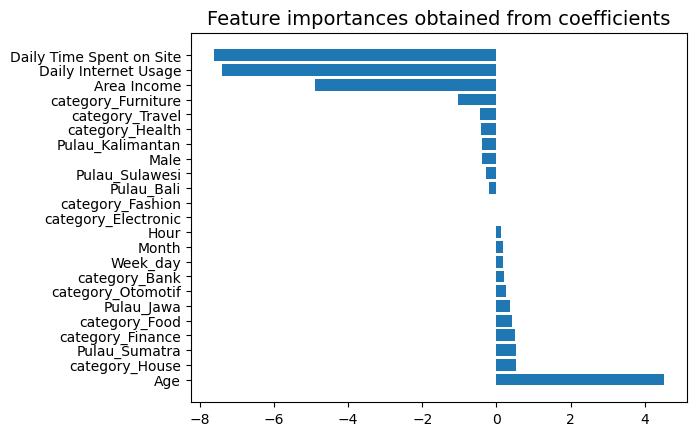

In [33]:
# fit model
model = LogisticRegression(random_state=123, solver='newton-cg', penalty='l2', C=3.435)
model.fit(X_train_2, y_train_2)

# membuat dataframe fitur
importances = pd.DataFrame(data={
    'Attribute': X_train_2.columns,
    'Importance': model.coef_[0]})
importances = importances.sort_values(by='Importance', ascending=False)

# visualisasi
plt.barh(y=importances['Attribute'], width=importances['Importance'])
plt.title('Feature importances obtained from coefficients', size=14)
plt.show()

### **Confussion Matrix Logistic Regression**

In [53]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def c_matrix (model) :
  y_pred = model.predict(X_test_2)
  cf_matrix = confusion_matrix(y_test_2, y_pred)

  # mengatur matrix
  fig = plt.figure(figsize = (8,5))
  group_names = ['TRUE NEGATIF','FALSE POSITIF','FALSE NEGATIF','TRUE POSITIF']
  group_counts = ['{0:0.0f}'.format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)

  # display matrix
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdBu', annot_kws={'size': 15})

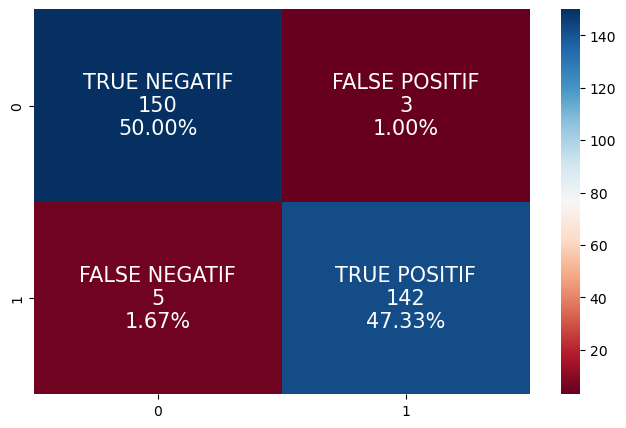

In [54]:
c_matrix(model)